In [1]:
import IPython.display as display
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torchaudio
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
from torchvision import models, transforms

/home/aleksander/anaconda3/envs/bigaischool/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/aleksander/anaconda3/envs/bigaischool/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/ka

In [3]:
import IPython.display as display
display.Audio('/home/aleksander/PycharmProjects/bigaischool/DEEP LEARNING/AUDIO/DATA/ESC-50/audio/1-100032-A-0.wav')

In [6]:
import glob
from collections import Counter

In [9]:
esc50_list = [f.split("-")[-1].replace(".wav","")
              for f in glob.glob("/home/aleksander/PycharmProjects/bigaischool/DEEP LEARNING/AUDIO/DATA/ESC-50/audio/*.wav")]
Counter(esc50_list)

Counter({'17': 40,
         '30': 40,
         '15': 40,
         '29': 40,
         '32': 40,
         '1': 40,
         '40': 40,
         '31': 40,
         '12': 40,
         '2': 40,
         '39': 40,
         '43': 40,
         '18': 40,
         '23': 40,
         '46': 40,
         '19': 40,
         '38': 40,
         '35': 40,
         '22': 40,
         '34': 40,
         '21': 40,
         '0': 40,
         '37': 40,
         '16': 40,
         '28': 40,
         '49': 40,
         '14': 40,
         '45': 40,
         '47': 40,
         '9': 40,
         '44': 40,
         '24': 40,
         '27': 40,
         '26': 40,
         '7': 40,
         '41': 40,
         '33': 40,
         '13': 40,
         '25': 40,
         '36': 40,
         '42': 40,
         '5': 40,
         '4': 40,
         '20': 40,
         '10': 40,
         '3': 40,
         '11': 40,
         '6': 40,
         '8': 40,
         '48': 40})

In [10]:
esc50_list

['17',
 '30',
 '30',
 '15',
 '29',
 '32',
 '1',
 '40',
 '31',
 '12',
 '2',
 '39',
 '43',
 '18',
 '23',
 '46',
 '29',
 '39',
 '15',
 '31',
 '19',
 '38',
 '35',
 '39',
 '23',
 '22',
 '34',
 '21',
 '2',
 '0',
 '34',
 '17',
 '37',
 '35',
 '32',
 '43',
 '15',
 '16',
 '28',
 '23',
 '49',
 '17',
 '14',
 '32',
 '45',
 '47',
 '39',
 '40',
 '23',
 '40',
 '28',
 '9',
 '34',
 '44',
 '24',
 '17',
 '9',
 '12',
 '49',
 '16',
 '27',
 '26',
 '26',
 '45',
 '47',
 '9',
 '35',
 '30',
 '44',
 '27',
 '7',
 '17',
 '7',
 '45',
 '31',
 '37',
 '31',
 '41',
 '33',
 '39',
 '13',
 '41',
 '30',
 '25',
 '36',
 '15',
 '24',
 '42',
 '5',
 '7',
 '0',
 '30',
 '1',
 '47',
 '32',
 '25',
 '0',
 '4',
 '26',
 '34',
 '15',
 '29',
 '4',
 '41',
 '20',
 '46',
 '17',
 '38',
 '10',
 '13',
 '2',
 '28',
 '32',
 '30',
 '3',
 '25',
 '4',
 '44',
 '46',
 '36',
 '33',
 '11',
 '18',
 '6',
 '25',
 '35',
 '34',
 '21',
 '8',
 '18',
 '4',
 '5',
 '43',
 '0',
 '46',
 '6',
 '30',
 '13',
 '47',
 '42',
 '27',
 '25',
 '3',
 '38',
 '17',
 '37',
 '41

In [11]:
class ESC50(Dataset):
    def __init__(self,path):
        # Get directory listing from path
        files = Path(path).glob('*.wav')
        # Iterate through the listing and create a list of tuples (filename, label)
        self.items = [(str(f),f.name.split("-")[-1].replace(".wav","")) for f in files]
        self.length = len(self.items)
    def __getitem__(self, index):
        filename, label = self.items[index]
        audioTensor, rate = torchaudio.load(filename)
        return (audioTensor, int(label))     
    def __len__(self):
        return self.length

In [31]:
PATH_TO_ESC50 = Path.cwd() / 'DATA' / 'ESC-50' / 'audio'

In [32]:
PATH_TO_ESC50

PosixPath('/home/aleksander/PycharmProjects/bigaischool/DEEP LEARNING/AUDIO/DATA/ESC-50/audio')

In [34]:
device="cuda"
bs=64

train_esc50 = ESC50(PATH_TO_ESC50 / "train")
valid_esc50 = ESC50(PATH_TO_ESC50 / "valid")
test_esc50  = ESC50(PATH_TO_ESC50 / "test")

train_loader = torch.utils.data.DataLoader(train_esc50, batch_size = bs, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_esc50, batch_size = bs, shuffle = True)
test_loader  = torch.utils.data.DataLoader(test_esc50, batch_size = bs, shuffle = True)

In [35]:
class AudioNet(nn.Module):
    def __init__(self):
        super(AudioNet, self).__init__()
        self.conv1 = nn.Conv1d(100, 128, kernel_size=5, stride=4)
        self.bn1 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(128, 128, 3)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(128, 256, 3)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(256, 512, 3)
        self.bn4 = nn.BatchNorm1d(512)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(512, 50)

    def forward(self, x):
        x = x.unsqueeze(-1).view(-1, 100, 2205)
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = x.squeeze(-1)
        x = self.fc1(x)
        return x

In [36]:
audionet = AudioNet()
audionet.to(device)

AudioNet(
  (conv1): Conv1d(100, 128, kernel_size=(5,), stride=(4,))
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(256, 512, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=50, 

In [37]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))
        
def find_lr(model, loss_fn, optimizer, train_loader, init_value=1e-8, final_value=10.0, device="cpu"):
    number_in_epoch = len(train_loader) - 1
    update_step = (final_value / init_value) ** (1 / number_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    for data in train_loader:
        batch_num += 1
        inputs, targets = data
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # Crash out if loss explodes

        if batch_num > 1 and loss > 4 * best_loss:
            if(len(log_lrs) > 20):
                return log_lrs[10:-5], losses[10:-5]
            else:
                return log_lrs, losses

        # Record the best loss

        if loss < best_loss or batch_num == 1:
            best_loss = loss

        # Store the values
        losses.append(loss.item())
        log_lrs.append((lr))

        # Do the backward pass and optimize

        loss.backward()
        optimizer.step()

        # Update the lr for the next step and store

        lr *= update_step
        optimizer.param_groups[0]["lr"] = lr
    if(len(log_lrs) > 20):
        return log_lrs[10:-5], losses[10:-5]
    else:
        return log_lrs, losses

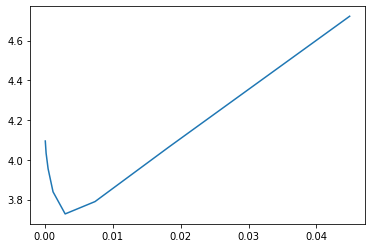

In [38]:
torch.save(audionet.state_dict(), "audionet.pth")
optimizer = optim.Adam(audionet.parameters(), lr=0.001)
logs,losses = find_lr(audionet, nn.CrossEntropyLoss(), optimizer, train_loader, device=device)

plt.plot(logs,losses)

In [39]:
lr = 1e-5
audionet.load_state_dict(torch.load("audionet.pth"))
import torch.optim as optim
optimizer = optim.Adam(audionet.parameters(), lr=lr)

In [40]:
train(audionet, optimizer, torch.nn.CrossEntropyLoss(),train_loader, valid_loader, epochs=20, device=device)

<ipython-input-37-2e0ef812e15e>:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets).view(-1)


Epoch: 0, Training Loss: 4.03, Validation Loss: 3.93, accuracy = 0.02
Epoch: 1, Training Loss: 3.89, Validation Loss: 3.91, accuracy = 0.02
Epoch: 2, Training Loss: 3.81, Validation Loss: 3.86, accuracy = 0.04
Epoch: 3, Training Loss: 3.73, Validation Loss: 3.83, accuracy = 0.03
Epoch: 4, Training Loss: 3.68, Validation Loss: 3.80, accuracy = 0.04
Epoch: 5, Training Loss: 3.62, Validation Loss: 3.77, accuracy = 0.06
Epoch: 6, Training Loss: 3.58, Validation Loss: 3.75, accuracy = 0.06
Epoch: 7, Training Loss: 3.53, Validation Loss: 3.73, accuracy = 0.07
Epoch: 8, Training Loss: 3.49, Validation Loss: 3.71, accuracy = 0.07
Epoch: 9, Training Loss: 3.44, Validation Loss: 3.69, accuracy = 0.07
Epoch: 10, Training Loss: 3.41, Validation Loss: 3.68, accuracy = 0.07
Epoch: 11, Training Loss: 3.36, Validation Loss: 3.67, accuracy = 0.08
Epoch: 12, Training Loss: 3.34, Validation Loss: 3.66, accuracy = 0.07
Epoch: 13, Training Loss: 3.30, Validation Loss: 3.64, accuracy = 0.08
Epoch: 14, Train

In [44]:
sample_data, sr = librosa.load("/home/aleksander/PycharmProjects/bigaischool/DEEP LEARNING/AUDIO/DATA/ESC-50/audio/train"+"/1-100032-A-0.wav", sr=None)
spectrogram = librosa.feature.melspectrogram(sample_data, sr=sr)
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')

KeyboardInterrupt: 

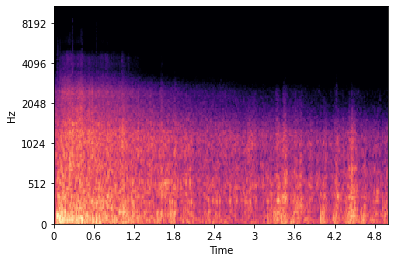

In [46]:
def precompute_spectrograms(path, dpi=50):
    files = Path(path).glob('*.wav')
    for filename in files:
        audio_tensor, sr = librosa.load(filename, sr=None)
        spectrogram = librosa.feature.melspectrogram(audio_tensor, sr=sr)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.gcf().savefig("{}{}_{}.png".format(filename.parent,dpi,filename.name), dpi=dpi)

PATH_ESC50_TRAIN = PATH_TO_ESC50 / "train"
PATH_ESC50_VALID = PATH_TO_ESC50 / "valid"

precompute_spectrograms(PATH_ESC50_TRAIN)
precompute_spectrograms(PATH_ESC50_VALID)

In [ ]:
class PrecomputedESC50(Dataset):
    def __init__(self,path,dpi=50, img_transforms=None):
        files = Path(path).glob('{}{}*.wav.png'.format(path.name, dpi))
        self.items = [(f,int(f.name.split("-")[-1].replace(".wav.png",""))) for f in files]
        self.length = len(self.items)
        if img_transforms == None:
            self.img_transforms = transforms.Compose([transforms.ToTensor()])
        else:
            self.img_transforms = img_transforms
    
    def __getitem__(self, index):
        filename, label = self.items[index]
        img = Image.open(filename).convert('RGB')
        return (self.img_transforms(img), label)
            
    def __len__(self):
        return self.length

In [ ]:
spec_resnet = models.resnet50(pretrained=True)

for param in spec_resnet.parameters():
    param.requires_grad = False

spec_resnet.fc = nn.Sequential(nn.Linear(spec_resnet.fc.in_features,500),
                               nn.ReLU(),
                               nn.Dropout(), nn.Linear(500,50))

In [ ]:
esc50pre_train = PrecomputedESC50(PATH_ESC50_TRAIN,
                                  img_transforms=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])])
)

esc50pre_valid = PrecomputedESC50(PATH_ESC50_VALID,
                                  img_transforms=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])])
)

esc50_train_loader = torch.utils.data.DataLoader(esc50pre_train, bs, shuffle=True)
esc50_val_loader = torch.utils.data.DataLoader(esc50pre_valid, bs, shuffle=True)

In [ ]:
spec_resnet.to(device) 
torch.save(spec_resnet.state_dict(), "spec_resnet.pth")
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(spec_resnet.parameters(), lr=lr)
logs,losses = find_lr(spec_resnet, loss_fn, optimizer, esc50_train_loader, device=device)
plt.plot(logs, losses)

In [ ]:
spec_resnet.load_state_dict(torch.load("spec_resnet.pth"))
optimizer = optim.Adam([
                        {'params': spec_resnet.conv1.parameters()},
                        {'params': spec_resnet.bn1.parameters()},
                        {'params': spec_resnet.relu.parameters()},
                        {'params': spec_resnet.maxpool.parameters()},
                        {'params': spec_resnet.layer1.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.layer2.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.layer3.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.layer4.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.avgpool.parameters(), 'lr': 1e-4},
                        {'params': spec_resnet.fc.parameters(), 'lr': 1e-8}
                        ], lr=1e-2)

train(spec_resnet, optimizer, nn.CrossEntropyLoss(), esc50_train_loader, esc50_val_loader, epochs=5, device=device)

for param in spec_resnet.parameters():
    param.requires_grad = True

train(spec_resnet, optimizer, nn.CrossEntropyLoss(), esc50_train_loader, esc50_val_loader, epochs=5, device=device)

In [ ]:
class ESC50WithPitchChange(Dataset):

    def __init__(self,path):
        # Get directory listing from path
        files = Path(path).glob('*.wav')
        # Iterate through the listing and create a list of tuples (filename, label)
        self.items = [(f,f.name.split("-")[-1].replace(".wav","")) for f in files]
        self.length = len(self.items)
        self.E = torchaudio.sox_effects.SoxEffectsChain()
        self.E.append_effect_to_chain("pitch", [0.5])
    
    def __getitem__(self, index):
        filename, label = self.items[index]
        self.E.set_input_file(filename)
        audio_tensor, sample_rate = self.E.sox_build_flow_effects()
        return audio_tensor, label
        
    def __len__(self):
        return self.length

In [ ]:
class FrequencyMask(object):
    """
      Example:
        >>> transforms.Compose([
        >>>     transforms.ToTensor(),
        >>>     FrequencyMask(max_width=10, use_mean=False),
        >>> ])

    """

    def __init__(self, max_width, use_mean=True):
        self.max_width = max_width
        self.use_mean = use_mean

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of 
            size (C, H, W) where the frequency 
            mask is to be applied.

        Returns:
            Tensor: Transformed image with Frequency Mask.
        """
        start = random.randrange(0, tensor.shape[2])
        end = start + random.randrange(1, self.max_width)
        if self.use_mean:
            tensor[:, start:end, :] = tensor.mean()
        else:
            tensor[:, start:end, :] = 0
        return tensor

    def __repr__(self):
        format_string = self.__class__.__name__ + "(max_width="
        format_string += str(self.max_width) + ")"
        format_string += 'use_mean=' + (str(self.use_mean) + ')')

        return format_string

In [ ]:
transforms.Compose([FrequencyMask(max_width=10, use_mean=False),
transforms.ToPILImage()])(torch.rand(3,250,200))

In [ ]:
class TimeMask(object):
    """
      Example:
        >>> transforms.Compose([
        >>>     transforms.ToTensor(),
        >>>     TimeMask(max_width=10, use_mean=False),
        >>> ])

    """

    def __init__(self, max_width, use_mean=True):
        self.max_width = max_width
        self.use_mean = use_mean

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of 
            size (C, H, W) where the time mask 
            is to be applied.

        Returns:
            Tensor: Transformed image with Time Mask.
        """
        start = random.randrange(0, tensor.shape[1])
        end = start + random.randrange(0, self.max_width)
        if self.use_mean:
            tensor[:, :, start:end] = tensor.mean()
        else:
            tensor[:, :, start:end] = 0
        return tensor

    def __repr__(self):
        format_string = self.__class__.__name__ + "(max_width="
        format_string += str(self.max_width) + ")"
        format_string += 'use_mean=' + (str(self.use_mean) + ')')
        return format_string

In [ ]:
transforms.Compose([TimeMask(max_width=10, use_mean=False),
transforms.ToPILImage()])(torch.rand(3,250,200))

In [ ]:
class PrecomputedTransformESC50(Dataset):
    def __init__(self, path, max_freqmask_width, max_timemask_width, use_mean=True, dpi=50):
        files = Path(path).glob('{}*.wav.png'.format(dpi))
        self.items = [(f,f.name.split("-")[-1].replace(".wav.png","")) for f in files]
        self.length = len(self.items)
        self.max_freqmask_width = max_freqmask_width
        self.max_timemask_width = max_timemask_width
        self.use_mean = use_mean
        self.img_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.RandomApply([FrequencyMask(self.max_freqmask_width, self.use_mean)], p=0.5),
            transforms.RandomApply([TimeMask(self.max_timemask_width, self.use_mean)], p=0.5)
])
        
    def __getitem__(self, index):
        filename, label = self.items[index]
        img = Image.open(filename)
        return (self.img_transforms(img), label)
        
    def __len__(self):
        return self.length